<a href="https://colab.research.google.com/github/Khairul122/APOTIK-CODE/blob/master/Code_Train_YoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install ultralytics

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
!yolo detect train model=yolov8n.pt data="/content/drive/MyDrive/Yolo V8/data.yaml" epochs=20

Ultralytics 8.3.195 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Yolo V8/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

In [24]:
!zip -r /content/train2.zip /content/runs/detect/train2
from google.colab import files
files.download("/content/train2.zip")

  adding: content/runs/detect/train2/ (stored 0%)
  adding: content/runs/detect/train2/BoxPR_curve.png (deflated 24%)
  adding: content/runs/detect/train2/train_batch382.jpg (deflated 6%)
  adding: content/runs/detect/train2/val_batch1_labels.jpg (deflated 7%)
  adding: content/runs/detect/train2/results.png (deflated 7%)
  adding: content/runs/detect/train2/train_batch0.jpg (deflated 2%)
  adding: content/runs/detect/train2/train_batch2.jpg (deflated 1%)
  adding: content/runs/detect/train2/val_batch0_labels.jpg (deflated 6%)
  adding: content/runs/detect/train2/confusion_matrix.png (deflated 25%)
  adding: content/runs/detect/train2/val_batch1_pred.jpg (deflated 7%)
  adding: content/runs/detect/train2/val_batch0_pred.jpg (deflated 6%)
  adding: content/runs/detect/train2/BoxP_curve.png (deflated 12%)
  adding: content/runs/detect/train2/BoxR_curve.png (deflated 12%)
  adding: content/runs/detect/train2/train_batch380.jpg (deflated 3%)
  adding: content/runs/detect/train2/weights/ (s

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
  !yolo detect val model="/content/drive/MyDrive/Yolo V8/runs/detect/train2/weights/best.pt" data="/content/drive/MyDrive/Yolo V8/data.yaml"

Ultralytics 8.3.195 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 16.7±7.0 MB/s, size: 57.7 KB)
val: Scanning /content/drive/MyDrive/Yolo V8/valid/labels.cache... 57 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 57/57 651.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.2it/s 21.5s
                   all         57         57      0.978      0.992      0.995      0.738
        Ikan Baramundi          9          9      0.963          1      0.995      0.798
    Ikan Belanak Merah          9          9      0.975          1      0.995      0.698
         Ikan Cakalang          8          8          1      0.967      0.995      0.688
      Ikan Kakap Putih          5          5      0.953          1      0.995      0.804
          Ikan Kembung         14      

In [43]:
import pandas as pd

results_path = '/content/drive/MyDrive/Yolo V8/runs/detect/train2/results.csv'

try:
    df = pd.read_csv(results_path)
    last_row = df.iloc[-1]

    precision_col = None
    recall_col = None

    for col in df.columns:
        if 'precision' in col.lower() or col.endswith('_P') or col == 'P':
            precision_col = col
        elif 'recall' in col.lower() or col.endswith('_R') or col == 'R':
            recall_col = col

    if precision_col and recall_col:
        precision = float(last_row[precision_col])
        recall = float(last_row[recall_col])
        total_ground_truth = 135

        TP = int(recall * total_ground_truth)
        FN = total_ground_truth - TP

        if precision > 0:
            total_predictions = TP / precision
            FP = int(total_predictions - TP)
        else:
            FP = 0

        TN = 0

        total = TP + FP + FN + TN
        accuracy = (TP + TN) / total if total > 0 else 0
        calc_precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        calc_recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score = 2 * (calc_precision * calc_recall) / (calc_precision + calc_recall) if (calc_precision + calc_recall) > 0 else 0

        print("CONFUSION MATRIX:")
        print(f"TP: {TP}")
        print(f"FP: {FP}")
        print(f"FN: {FN}")
        print(f"TN: {TN}")
        print()
        print("METRIK:")
        print(f"Akurasi: {accuracy:.4f}")
        print(f"Precision: {calc_precision:.4f}")
        print(f"Recall: {calc_recall:.4f}")
        print(f"F1-Score: {f1_score:.4f}")

    else:
        print("Kolom precision/recall tidak ditemukan")

except Exception as e:
    print(f"Error: {e}")

CONFUSION MATRIX:
TP: 133
FP: 2
FN: 2
TN: 0

METRIK:
Akurasi: 0.9708
Precision: 0.9852
Recall: 0.9852
F1-Score: 0.9852


In [44]:
model = YOLO("/content/drive/MyDrive/Yolo V8/runs/detect/train2/weights/best.pt")
model.export(format="tflite", int8=False, half=False)

Ultralytics 8.3.195 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/Yolo V8/runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (6.0 MB)

TensorFlow SavedModel: starting export with tensorflow 2.19.0...

ONNX: starting export with onnx 1.19.0 opset 19...
ONNX: slimming with onnxslim 0.1.67...
ONNX: export success ✅ 1.4s, saved as '/content/drive/MyDrive/Yolo V8/runs/detect/train2/weights/best.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.28.2...
Saved artifact at '/content/drive/MyDrive/Yolo V8/runs/detect/train2/weights/best_saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 640, 640, 3), dtype=tf.float32, name='images')
Output Type:
  TensorSpec(shape=(1, 10, 8400), dtype=

'/content/drive/MyDrive/Yolo V8/runs/detect/train2/weights/best_saved_model/best_float32.tflite'

Saving IMG-20250728-WA0003.jpg to IMG-20250728-WA0003 (2).jpg

image 1/1 /content/IMG-20250728-WA0003 (2).jpg: 640x480 1 Ikan Kembung, 175.1ms
Speed: 6.4ms preprocess, 175.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/predict4
[INFO] Hasil tersimpan di: /content/runs/detect/predict4/IMG-20250728-WA0003 (2).jpg


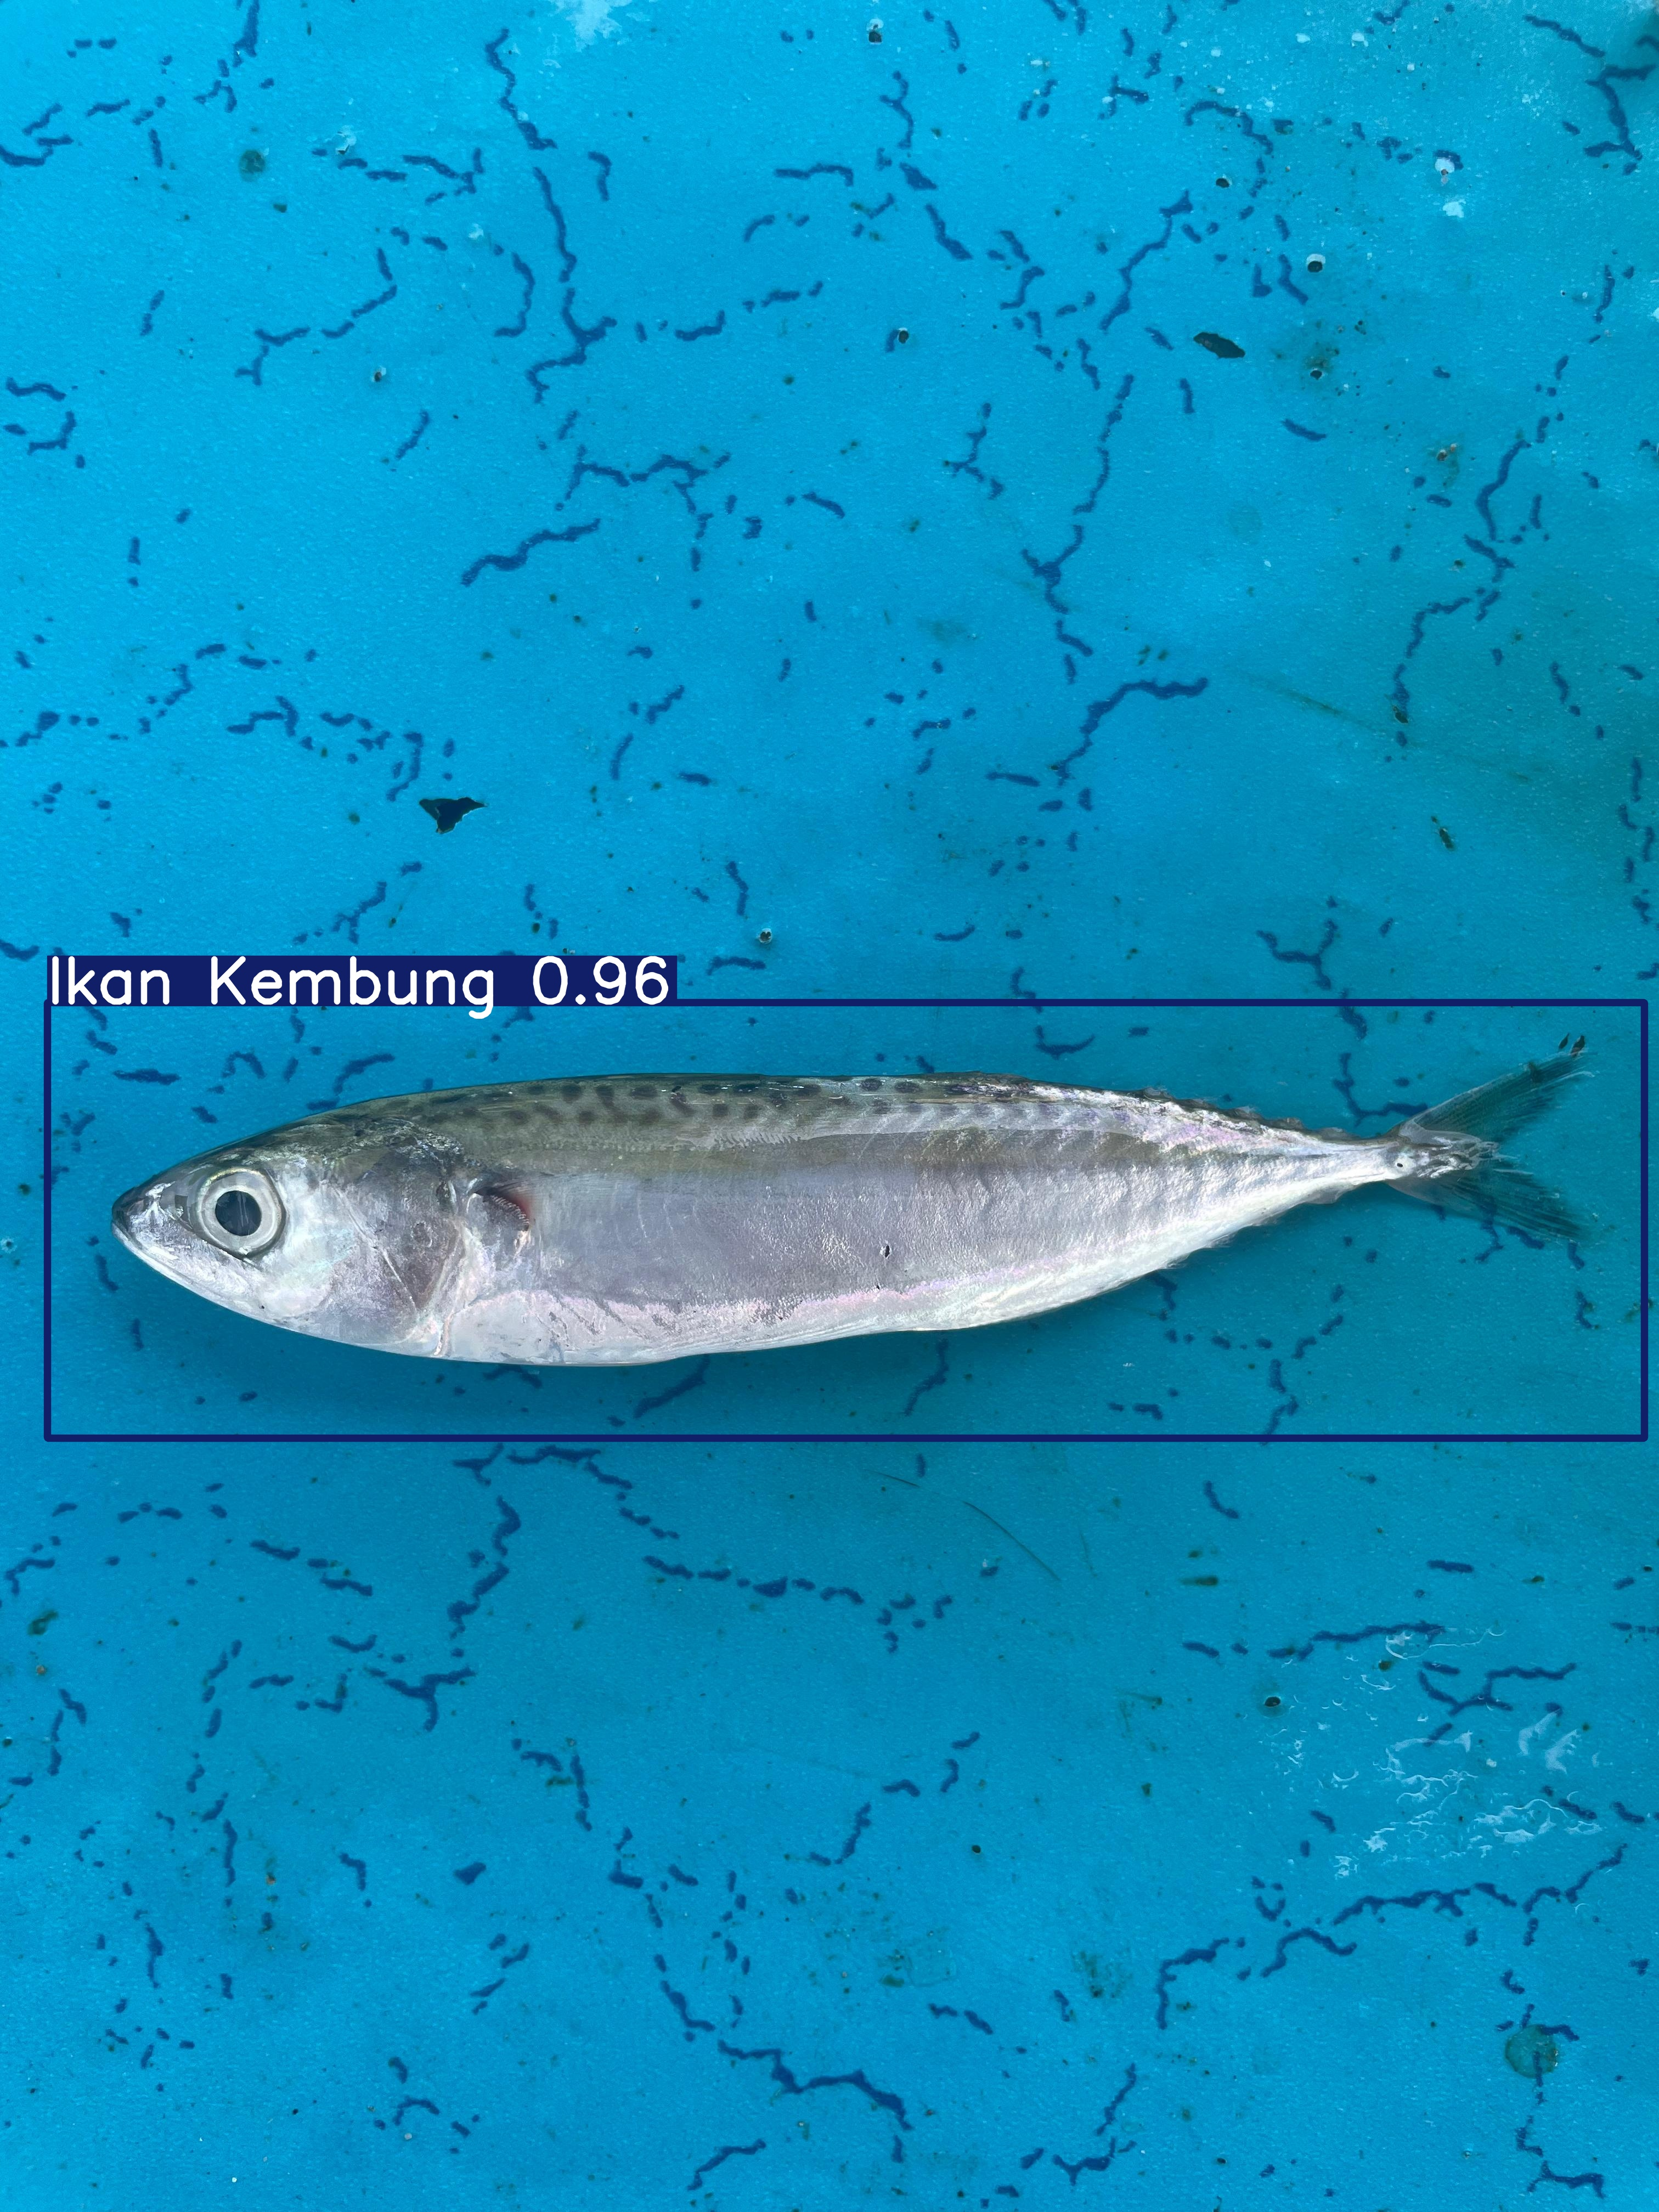

In [45]:
# === 0) Install & Import ===
!pip install -q ultralytics

from ultralytics import YOLO
from google.colab import files
from IPython.display import Image, display
from pathlib import Path

# === 1) Upload gambar uji ===
uploaded = files.upload()  # pilih 1 atau beberapa file gambar

# === 2) Load model (ganti path sesuai lokasi best.pt Anda) ===
model = YOLO("/content/drive/MyDrive/Yolo V8/runs/detect/train2/weights/best.pt")

# === 3) Prediksi & Tampilkan hasil beranotasi ===
for fname in uploaded.keys():
    # Jalankan inferensi; save=True agar gambar beranotasi disimpan otomatis
    results = model.predict(
        source=fname,
        save=True,        # simpan hasil beranotasi ke runs/detect/predict
        show=False,       # cv2.imshow tak didukung di Colab
        imgsz=640         # opsional, bisa disesuaikan
    )

    # Ambil path file hasil beranotasi dan tampilkan
    r = results[0]
    out_path = Path(r.save_dir) / Path(r.path).name  # .../runs/detect/predict/<nama_file>
    print(f"[INFO] Hasil tersimpan di: {out_path}")
    display(Image(filename=str(out_path)))
